## Homework 9: Dimensionality Reduction

Create an ipython notebook to provide a tutorial showing the steps to perform dimensional reduction using https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka as the basis and a dataset of your choosing :
Your tutorial will  include

1. a short description of what is the dimensionality of the data and why and how to pick the dimensions for use

2, Initial Data setup

3. Dimensional reduction process

4. Display in graph and plots

5. Discussion of the images in the graphs and plots

6. Bibliography ( urls and names of pages and authors of used code and descriptions )  Be sure to put in 

  You should submit your ipython notebook url in your github account or zip your homework9 directory and  submit it.

Be sure that if someone downloads your directory the notebook will run as shown.  So any scripts or images used in the notebook

are local to the directory of the notebook.  You must have citations and references marked in the text.  You can use http://www.citationmachine.net  to help standardize your references at the end of you document

For more credit continue with the cluster analysis of the dimensionally reduced code

#### Dimensionality Reduction
Dimensionality reduction is reducing the number of random variables under consideration in our dataset. This is done by getting a set of principle variables. 

#### Principal Component Analysis
Principal Component Analysis (PCA) is one of the techniques used for Dimensionality Reduction and it is a linear technique. This performs a mapping of the data to a lower dimensional space such that the variance of data in this new space is maximized and the variables under consideration are minimized. 

#### Dataset
I am using my project dataset for this assignment. This dataset is from https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [15]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Considering the attributes
We have 8 attributes in this dataset that together define the parameter Outcome which will be either 0 or 1 meaning the person is not diabetic or diabetic. We will implement PCA on this dataset to reduce the 8 attributes to minimum attributes with maximum variance that determine the outcome. 

In [46]:
x=diabetes_df.iloc[:,0:8]
Y=diabetes_df.iloc[:,8]

Selecting 2 principal components and implementing PCA

In [29]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
x_new = pca.fit(x)

In [31]:
print(pca.components_)

[[ -2.02176587e-03   9.78115765e-02   1.60930503e-02   6.07566861e-02
    9.93110844e-01   1.40108085e-02   5.37167919e-04  -3.56474430e-03]
 [ -2.26488861e-02  -9.72210040e-01  -1.41909330e-01   5.78614699e-02
    9.46266913e-02  -4.69729766e-02  -8.16804621e-04  -1.40168181e-01]]


In [33]:
x_transf = pca.transform(x)

In [35]:
x_transf.shape

(768L, 2L)

In [36]:
#Loading the principal components
x_transf_2d = pd.DataFrame(x_transf)
x_transf_2d.index = diabetes_df.index
x_transf_2d.columns = ['PC1','PC2']
x_transf_2d.head()

,PC1,PC2
0,-75.714655,-35.950783
1,-82.358268,28.908213
2,-74.630643,-67.906496
3,11.077423,34.898486
4,89.743788,-2.746937


In [37]:
print(pca.explained_variance_ratio_) 

[ 0.88854663  0.06159078]


Plotting the two principal components

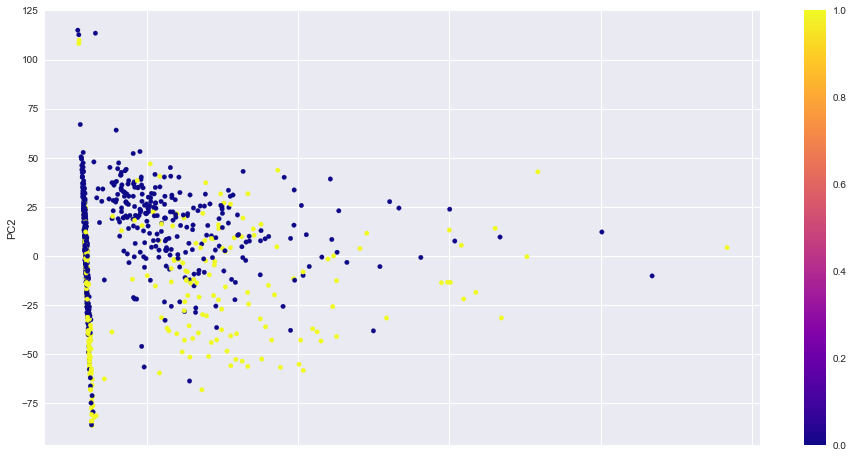

In [47]:
ax = x_transf_2d.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8), c=Y, cmap='plasma')


### Clustering Analysis on the reduced space

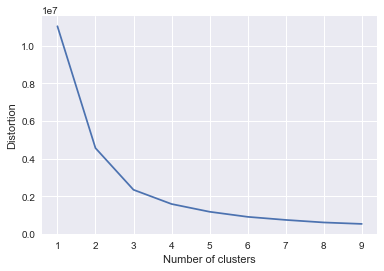

In [48]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

distortions = []

for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(x_transf_2d)
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Since we have 2 principal components, we are selecting 2 clusters

In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics

# K Means Cluster (n=3)
model = KMeans(n_clusters=2)
model.fit(x_transf_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
#classifying the dataset into clusters
predy = model.predict(x_transf_2d)
print(predy)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 

Finding the center of the clusters

In [54]:
cntr=model.cluster_centers_
print cntr

[[ -48.01442641    0.9976238 ]
 [ 175.4709038    -3.64586152]]


Plotting the clustered data with two principal components

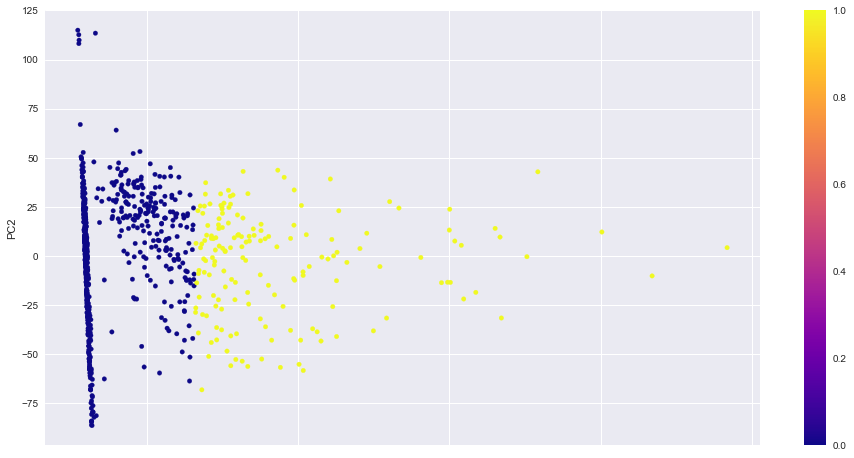

In [55]:
ax = x_transf_2d.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8), c=predy, cmap='plasma')

### References
https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka